

<font size="5">   <center> Model Selection</center>          
<br>
<center>by</center>  

<font size="5">    <center>Ramesh Kestur, IIIT-b</center>   
<br>
<center><font size="3"> Public profile</center>
<br>
<center><a href="https://www.linkedin.com/in/rameshkestur/" target="_blank">Linked In</a></center> 
<br>  
<center><a href="https://www.researchgate.net/profile/Ramesh_Kestur" target="_blank">Research Gate</a></center> 
<br> 
<center><a href="https://scholar.google.co.in/citations?user=P28Shk8AAAAJ&hl=en" target="_blank">Google Scholar</a></center>

## Model Selection 

### importing the necessary libraries

In [6]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

### Creating a synthetic dataset and preparing the data

In [7]:
# Create a synthetic dataset with increased separability
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, n_clusters_per_class=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Initialize classifiers

In [8]:
# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(probability=True)
}


### Train each model, plot ROC curve, and calculate AUC


In [9]:
# Train each model, plot ROC curve, and calculate AUC
auc_scores = {}  # Dictionary to store AUC scores for each model

for name, model in classifiers.items():
    # Train the model on the training set
    model.fit(X_train, y_train)
    
    # Obtain predicted probabilities of the positive class for instances in the test set
    y_probabilities = model.predict_proba(X_test)[:, 1]
    
    # Calculate ROC curve points (False Positive Rate, True Positive Rate, Thresholds)
    fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)
    
    # Calculate Area Under the Curve (AUC) from the ROC curve
    roc_auc = auc(fpr, tpr)
    auc_scores[name] = roc_auc

### Plot the ROC curve for each model and print AUC values

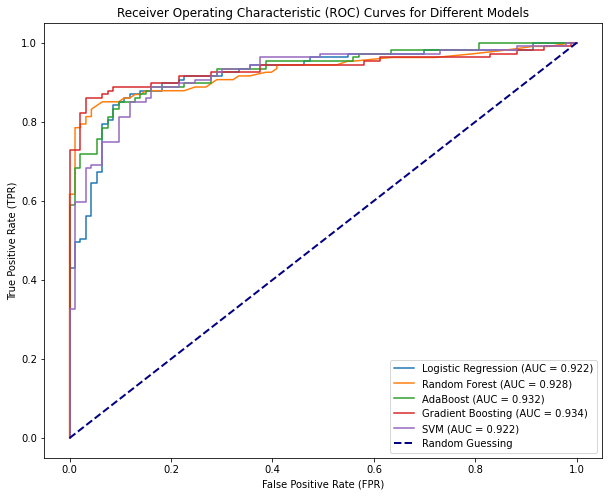


AUC Scores:
Logistic Regression: 0.922
Random Forest: 0.928
AdaBoost: 0.932
Gradient Boosting: 0.934
SVM: 0.922


In [10]:
# Plot the ROC curve for each model
plt.figure(figsize=(10, 8))

for name, model in classifiers.items():
    # Train the model on the training set
    model.fit(X_train, y_train)
    
    # Obtain predicted probabilities of the positive class for instances in the test set
    y_probabilities = model.predict_proba(X_test)[:, 1]
    
    # Calculate ROC curve points (False Positive Rate, True Positive Rate, Thresholds)
    fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)
    
    # Calculate Area Under the Curve (AUC) from the ROC curve
    roc_auc = auc(fpr, tpr)
    auc_scores[name] = roc_auc
    
    # Plot the ROC curve for each model
    plt.plot(fpr, tpr, label='{} (AUC = {:.3f})'.format(name, roc_auc))

# Plot the random guessing line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')

# Set plot labels and title
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curves for Different Models')
plt.legend(loc='lower right')  # Display legend in the lower right corner
plt.show()

# Display AUC values for each model
print("\nAUC Scores:")
for name, auc_score in auc_scores.items():
    print('{}: {:.3f}'.format(name, auc_score))

### Impact of thresholds

__Low Threshold__
As the threshold is decreased, more instances are predicted as positives, hence the TPR increases.
However,  more true negatives may be misclassified as false positives. This increases the FPR 

__High Threshold__
As the threshold is increased, there are lesser no of true positives leading to a decrease TPR. However, fewer True negatives are classifed as false positives, this decreases the FPR.

Optimal Threshold can be chosen based on RoC curves.

### Plot scatter plot of AUC versus models

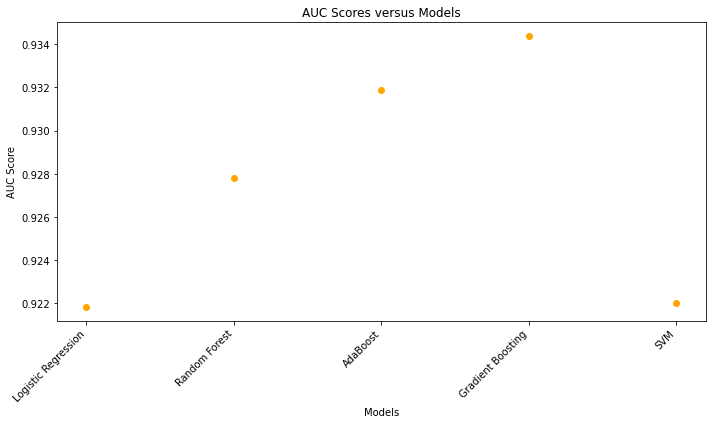

In [11]:
# Scatter plot of AUC versus model names
plt.figure(figsize=(10, 6))
plt.scatter(list(auc_scores.keys()), list(auc_scores.values()), color='orange')
plt.xlabel('Models')
plt.ylabel('AUC Score')
plt.title('AUC Scores versus Models')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

### Plot the performance parameters of all models

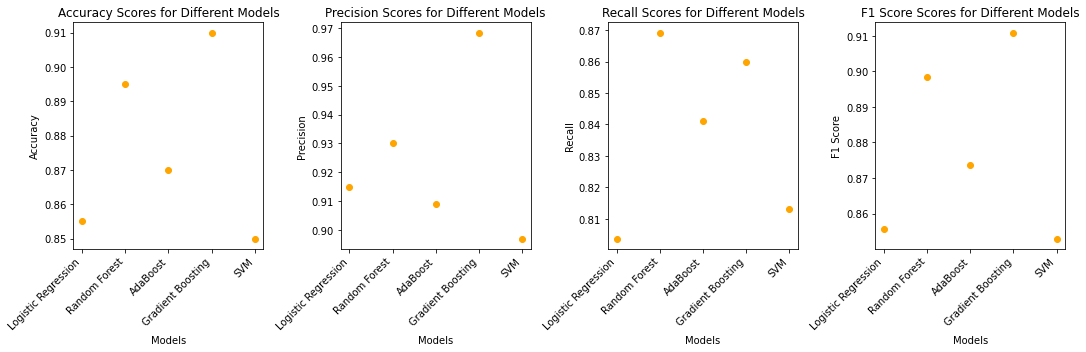

In [12]:
# Dictionary to store performance metrics
performance_metrics = {'Accuracy': {}, 'Precision': {}, 'Recall': {}, 'F1 Score': {}}

for name, model in classifiers.items():
    # Train the model on the training set
    model.fit(X_train, y_train)
    
    # Obtain predicted probabilities of the positive class for instances in the test set
    y_probabilities = model.predict_proba(X_test)[:, 1]
    
    # Predict binary labels based on a threshold (e.g., 0.5)
    y_pred = (y_probabilities >= 0.5).astype(int)
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store metrics in the dictionary
    performance_metrics['Accuracy'][name] = accuracy
    performance_metrics['Precision'][name] = precision
    performance_metrics['Recall'][name] = recall
    performance_metrics['F1 Score'][name] = f1

# Plot scatter plots for performance metrics in a single row
metrics_names = list(performance_metrics.keys())
plt.figure(figsize=(15, 5))

for i, metric in enumerate(metrics_names):
    plt.subplot(1, 4, i+1)
    plt.scatter(list(performance_metrics[metric].keys()), list(performance_metrics[metric].values()), color='orange')
    plt.xlabel('Models')
    plt.ylabel(metric)
    plt.title('{} Scores for Different Models'.format(metric))
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


### Precision-recall trade-off with only the best precision and recall points


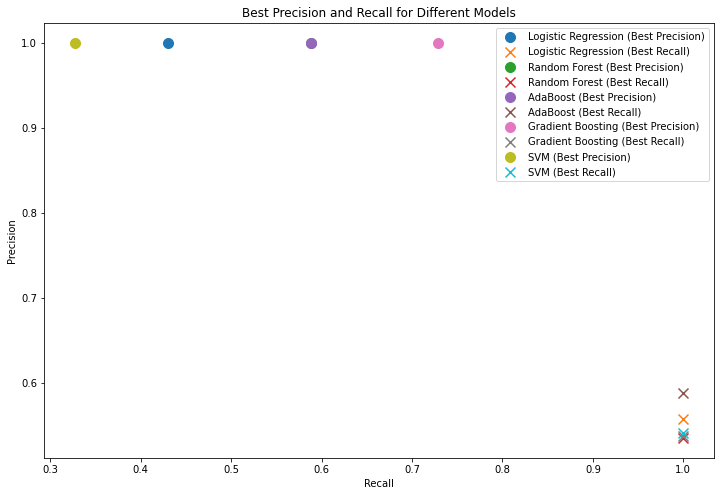

In [13]:
# Precision-recall trade-off with only the best precision and recall points
plt.figure(figsize=(12, 8))

for name, model in classifiers.items():
    # Train the model on the training set
    model.fit(X_train, y_train)
    
    # Obtain predicted probabilities of the positive class for instances in the test set
    y_probabilities = model.predict_proba(X_test)[:, 1]
    
    # Calculate precision-recall curve points
    precision, recall, thresholds = precision_recall_curve(y_test, y_probabilities)
    
    # Find the index of the maximum precision and recall
    idx_max_precision = np.argmax(precision)
    idx_max_recall = np.argmax(recall)
    
    # Plot the points corresponding to the maximum precision and recall
    plt.scatter(recall[idx_max_precision], precision[idx_max_precision], marker='o', s=100, label='{} (Best Precision)'.format(name))
    plt.scatter(recall[idx_max_recall], precision[idx_max_recall], marker='x', s=100, label='{} (Best Recall)'.format(name))

# Set plot labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Best Precision and Recall for Different Models')
plt.legend(loc='upper right')  # Move legend to the right-hand top corner
plt.show()